# Diabetes Prediction with Deep Learning

### Machine Learning step by step:
   1. Business & Data Understanding
   2. Data Cleaning & Analysis
   3. Data Modeling
   4. Model Evaluation
   5. Model Deployment & Maintenance

## Import necessary libraries

#### Base Libraries

In [349]:
import pandas as pd
import numpy as np 
import os
from scipy import stats
from scipy.stats import skew

#### Visualization

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Preprocessing

In [351]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

In [435]:
import imblearn
from imblearn.over_sampling import SMOTE

#### Algorithms

In [352]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import Callback

### Plot Style using Seaborn

In [353]:
plt.style.use('seaborn')

## 1. Business & Data Understanding

### This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
The objective of this notebook is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 
Several constraints were placed on the selection of these instances from a larger database. 
In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Load dataset

In [354]:
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','PedigreeFunction','Age','y']
df_diabetes = pd.read_csv("C:/Users/ejhas/OneDrive/Documents/miracles/JOBS/AI Bootcamp/WEEK6/day1/Dataset/pima-indians-diabetes.csv", header=None, names=column_names)

In [355]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-null    int64  
 2   BloodPressure     768 non-null    int64  
 3   SkinThickness     768 non-null    int64  
 4   Insulin           768 non-null    int64  
 5   BMI               768 non-null    float64
 6   PedigreeFunction  768 non-null    float64
 7   Age               768 non-null    int64  
 8   y                 768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [356]:
print('Total Rows : ', df_diabetes.shape[0])
print('Total Columns/Features : ', df_diabetes.shape[1])

Total Rows :  768
Total Columns/Features :  9


In [357]:
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunction,Age,y
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'PedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

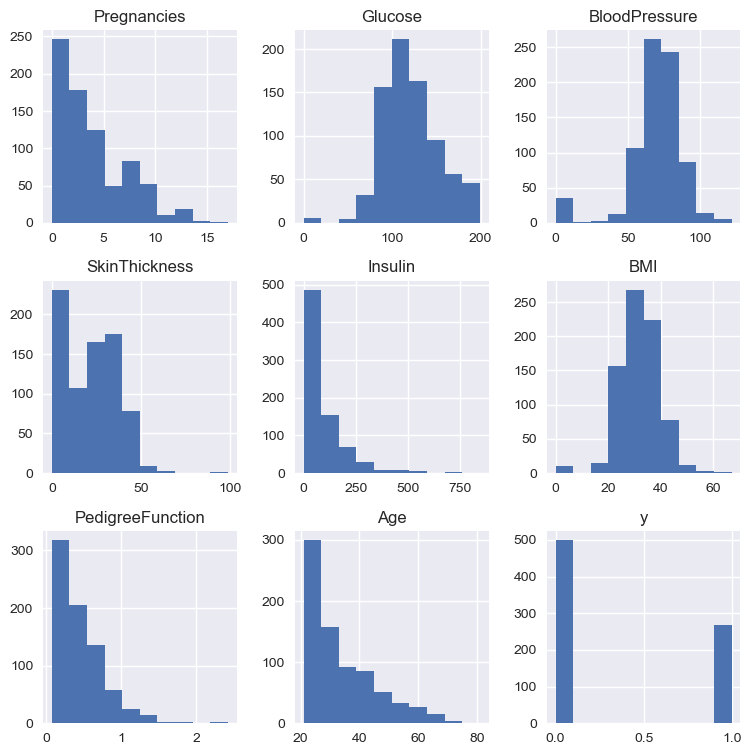

In [358]:
df_diabetes.hist(figsize=(9, 9))

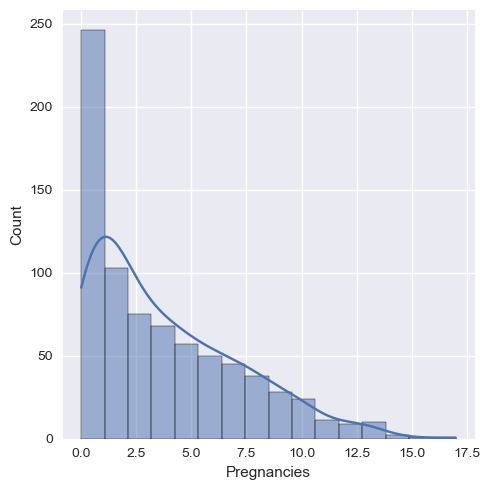

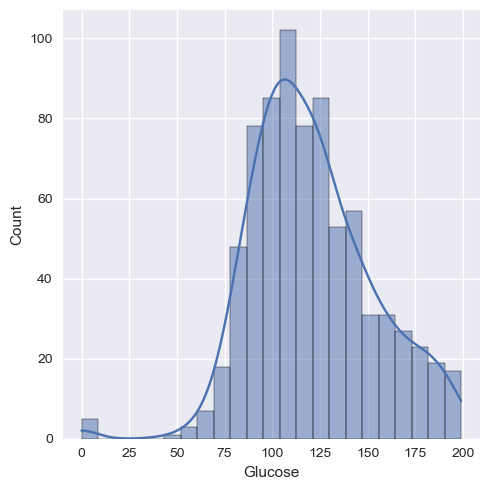

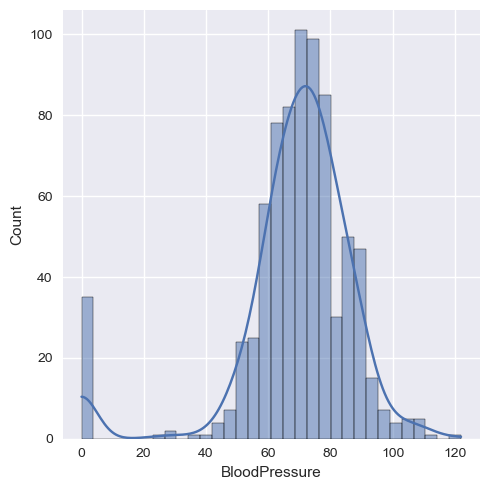

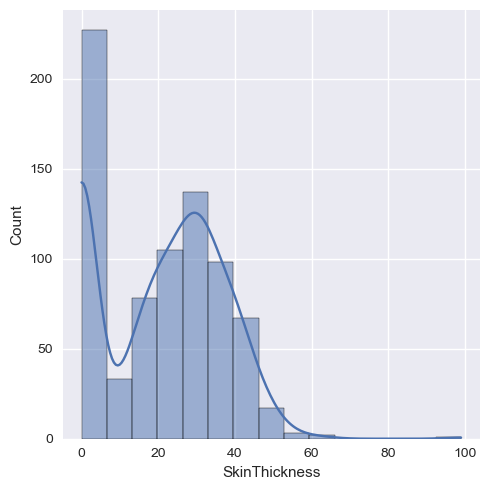

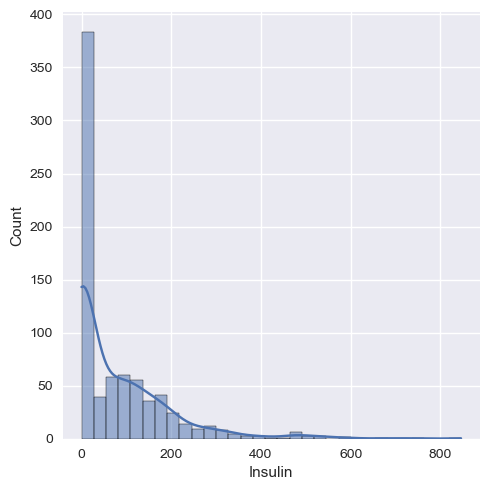

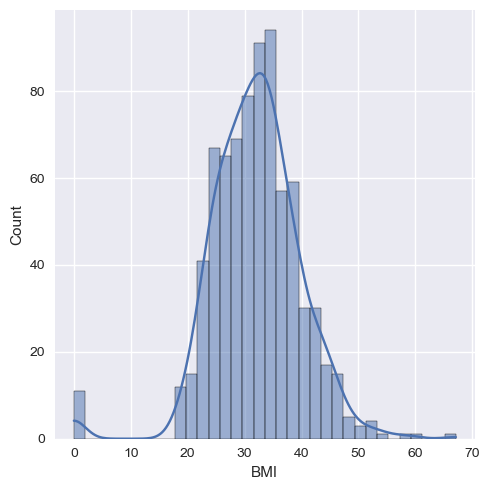

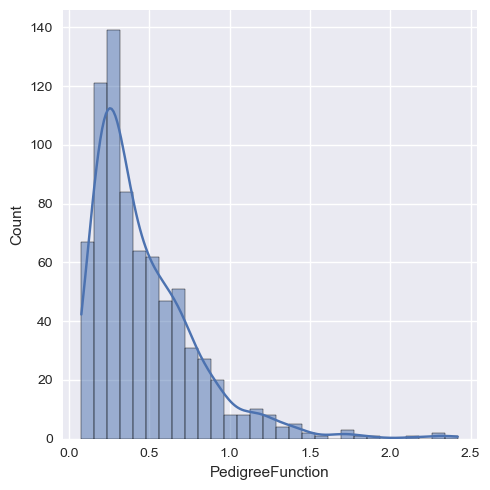

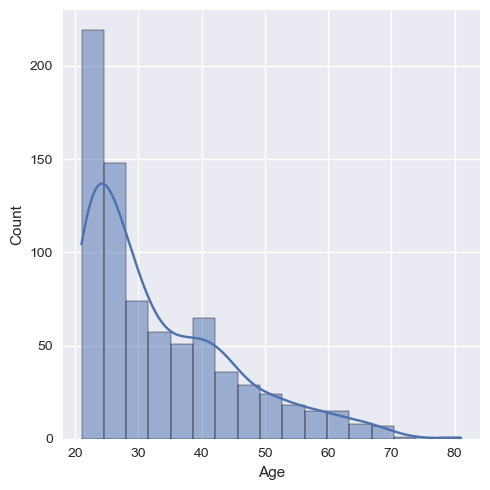

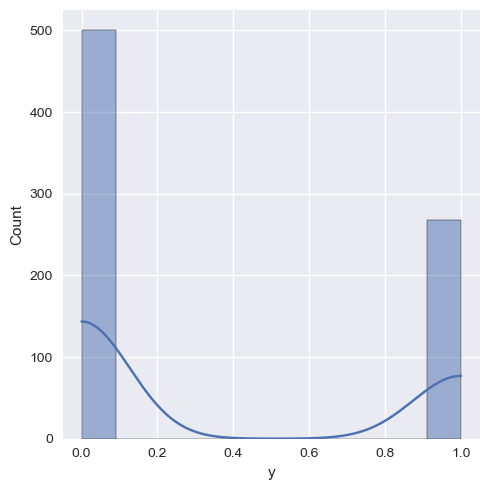

In [359]:
for x in df_diabetes.columns:
    sns.displot(df_diabetes[x],kde=True)
plt.show()

## 2. Data Cleaning & Analysis

#### Missing or Null Data points

In [360]:
# Missing value percentage checking
missing_percentage = (df_diabetes.isnull().sum() / len(df_diabetes)) * 100

# Show the missing percentage
print(missing_percentage)

Pregnancies         0.0
Glucose             0.0
BloodPressure       0.0
SkinThickness       0.0
Insulin             0.0
BMI                 0.0
PedigreeFunction    0.0
Age                 0.0
y                   0.0
dtype: float64


#### Unexpected Outliers Identified from Histogram
There are three features that could probably have outliers, such as Glucose, Blood Pressure, BMI, Insulin, Skin Thickness, Pedigree Function

#### Identify the columns with the value "0" by creating a boolean mask

In [361]:
# Exclude the "y" column
columns_to_check = df_diabetes.columns.difference(["y"])

# Create a boolean mask for rows where the value is "0"
mask = (df_diabetes[columns_to_check] == 0)

#### Summarize the results to see which columns have the value "0" in them

In [362]:
# Summarize the boolean mask to check which columns have at least one "0" value
columns_with_zeros = mask.any()

# List the column names with "0" values
columns_with_zeros = columns_with_zeros[columns_with_zeros].index

print("Columns with '0' values:")
print(columns_with_zeros)

Columns with '0' values:
Index(['BMI', 'BloodPressure', 'Glucose', 'Insulin', 'Pregnancies',
       'SkinThickness'],
      dtype='object')


#### Counts the number of zero values

In [363]:
# Exclude the 'y' column from the selection
numeric_columns = df_diabetes.select_dtypes(include=['number']).drop(columns=['y'])

# Count the number of zeros in each selected column
zero_counts = numeric_columns.eq(0).sum()

# Print the columns with zero counts
print("Columns with zero values and their counts (excluding 'y'):")
print(zero_counts[zero_counts > 0])

Columns with zero values and their counts (excluding 'y'):
Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


#### Target Value Counts

In [364]:
df_diabetes['y'].value_counts()

0    500
1    268
Name: y, dtype: int64

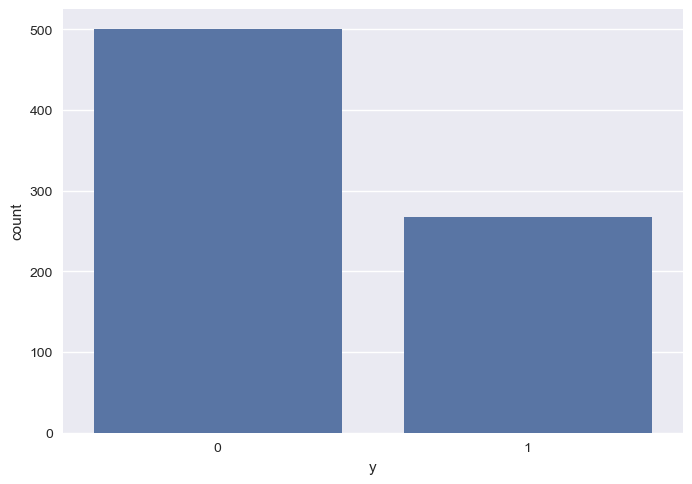

In [365]:
sns.countplot(x='y', data=df_diabetes)
plt.show()

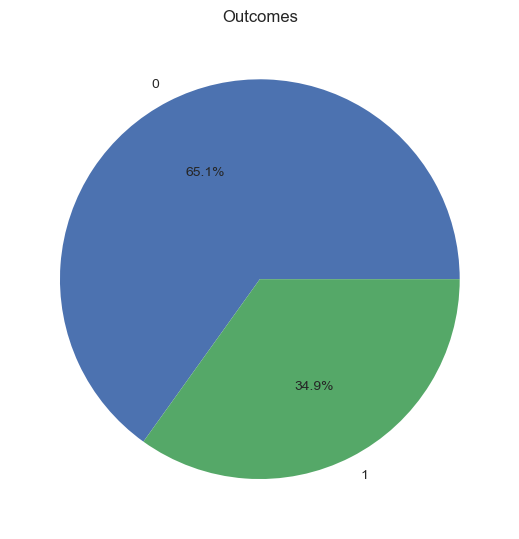

In [366]:
#df_diabetes['y'].value_counts().plot(kind='pie')
plt.pie(df_diabetes['y'].value_counts().tolist(), labels=['0', '1'], autopct='%1.1f%%')

plt.title("Outcomes")
plt.tight_layout()

plt.show()

#### Correlation

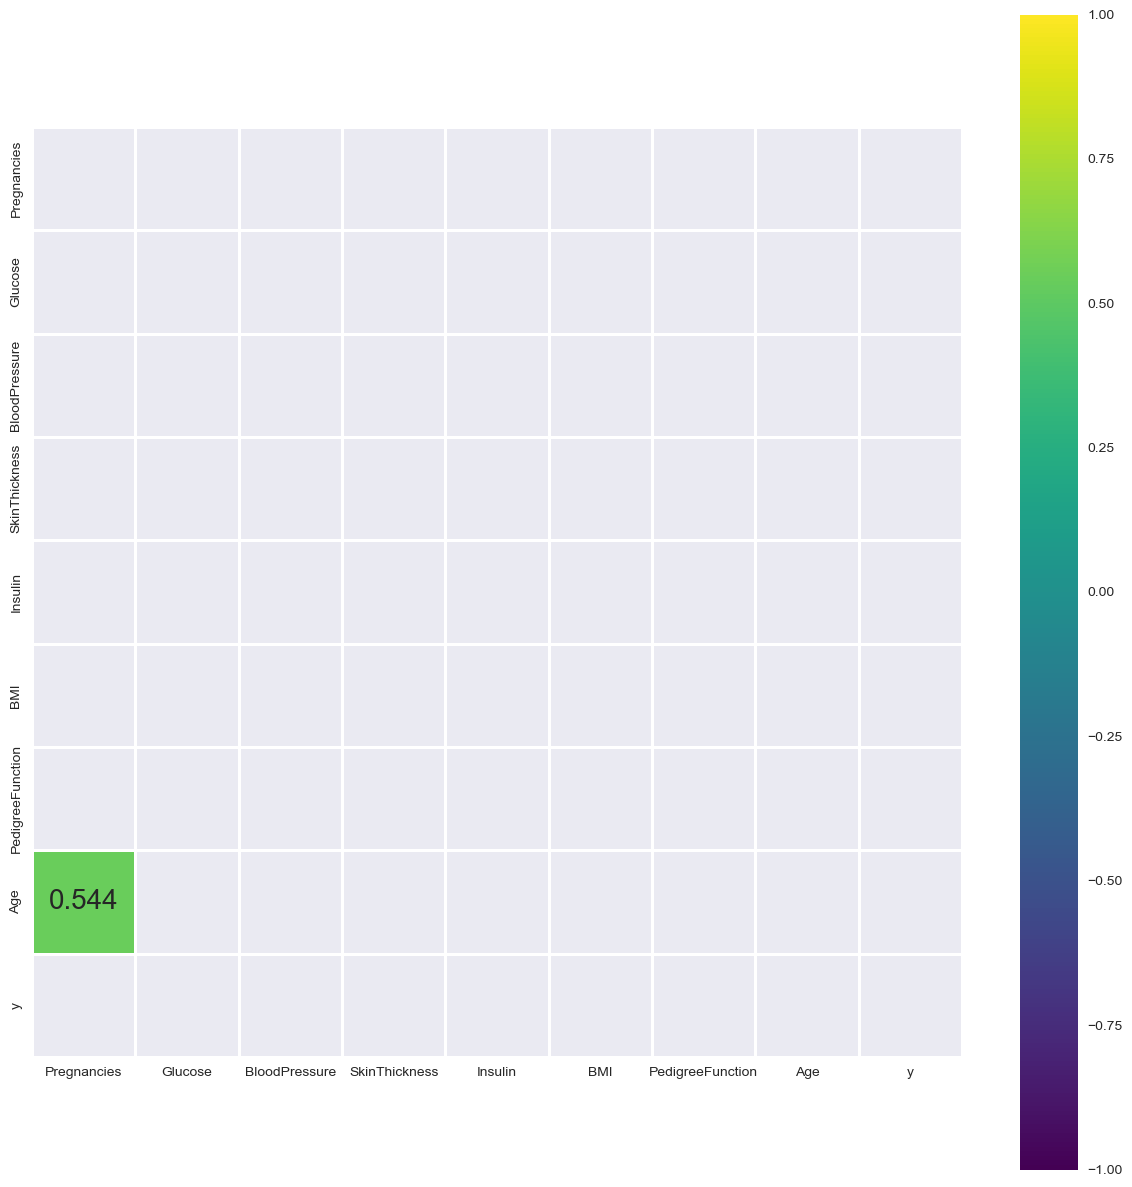

In [367]:
fig, ax = plt.subplots(figsize=(15, 15))
corr = df_diabetes.corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            ax=ax,
            mask=np.triu(corr, k=0),
            cmap='viridis',
            vmax=1.0, 
            vmin=-1.0, 
            linewidths=1.0,
            annot=True,
            annot_kws={'fontsize': 20},
            square=True,
            fmt='.3f')

plt.show()

In [368]:
df_diabetes.corr()['y']

Pregnancies         0.221898
Glucose             0.466581
BloodPressure       0.065068
SkinThickness       0.074752
Insulin             0.130548
BMI                 0.292695
PedigreeFunction    0.173844
Age                 0.238356
y                   1.000000
Name: y, dtype: float64

##### Diabetes Percentage by Age Range

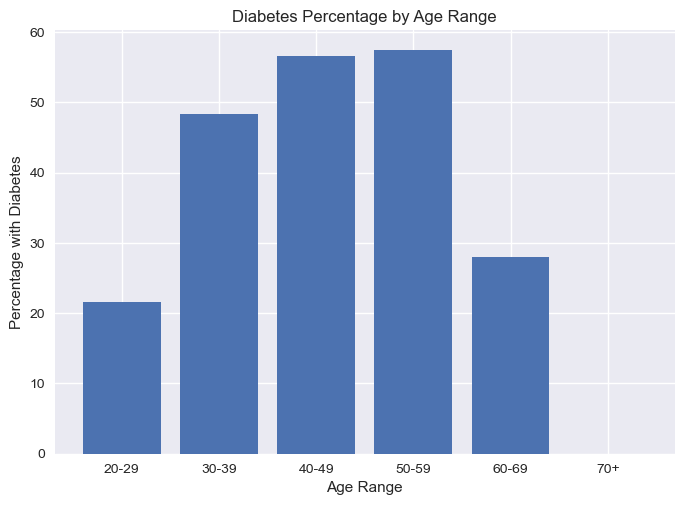

In [369]:
# Define Age ranges
age_bins = [20, 30, 40, 50, 60, 70, 80]  # Adjust the age ranges as needed
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']

#Use the pd.cut function to categorize ages into age ranges:
df_diabetes['AgeRange'] = pd.cut(df_diabetes['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

#Group the data by age range and calculate the percentage of diabetes cases (Diabetes=1):
age_diabetes = df_diabetes.groupby('AgeRange')['y'].mean() * 100

#Plot the data:
plt.bar(age_diabetes.index, age_diabetes)
plt.xlabel("Age Range")
plt.ylabel("Percentage with Diabetes")
plt.title("Diabetes Percentage by Age Range")
plt.show()

#### Check BMI distribution

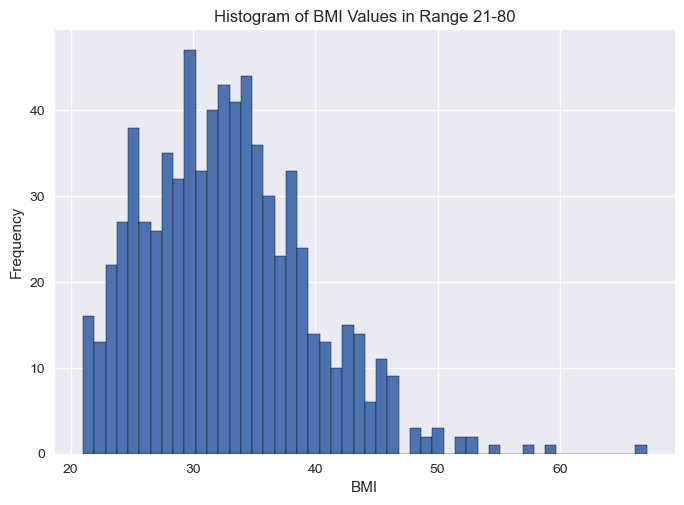

In [370]:
lower_limit = 21
upper_limit = 80
#Filter the DataFrame to select only the rows within your specified range:

filtered_df = df_diabetes[(df_diabetes['BMI'] >= lower_limit) & (df_diabetes['BMI'] <= upper_limit)]

plt.hist(filtered_df['BMI'], bins=50, edgecolor='k')  # You can adjust the number of bins.
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title(f'Histogram of BMI Values in Range {lower_limit}-{upper_limit}')
plt.grid(True)
plt.show()

##### BMI vs. Diabetes

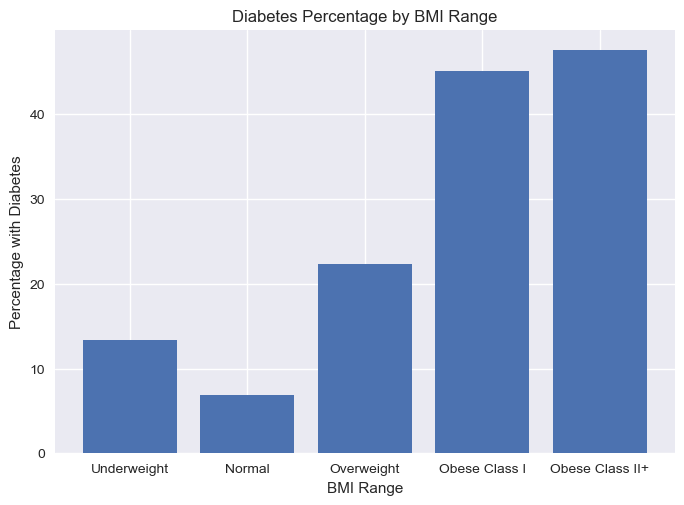

In [371]:
# Define BMI ranges
bmi_ranges = [0, 18.5, 24.9, 29.9, 34.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II+']

#Use the pd.cut function to categorize ages into age ranges:
df_diabetes['BMIRange'] = pd.cut(df_diabetes['BMI'], bins=bmi_ranges, labels=bmi_labels, include_lowest=True)

#Group the data by age range and calculate the percentage of diabetes cases (Diabetes=1):
bmi_diabetes = df_diabetes.groupby('BMIRange')['y'].mean() * 100

#Plot the data:
plt.bar(bmi_diabetes.index, bmi_diabetes)
plt.xlabel("BMI Range")
plt.ylabel("Percentage with Diabetes")
plt.title("Diabetes Percentage by BMI Range")
plt.show()

##### Glucose vs Diabetes

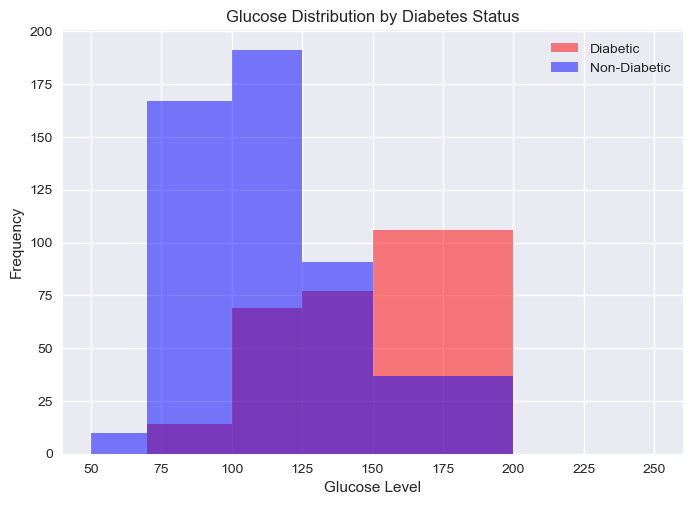

In [372]:
#Create two separate data series for diabetic and non-diabetic patients:
glucose_diabetic = df_diabetes[df_diabetes['y'] == 1]['Glucose']

glucose_non_diabetic = df_diabetes[df_diabetes['y'] == 0]['Glucose']
# Define the bins (ranges) for the histogram
bins = [50, 70, 100, 125, 150, 200, 250]

# Plot histogram for diabetic patients
plt.hist(glucose_diabetic, bins=bins, alpha=0.5, label='Diabetic', color='red')

# Plot histogram for non-diabetic patients
plt.hist(glucose_non_diabetic, bins=bins, alpha=0.5, label='Non-Diabetic', color='blue')

# Labeling and legend
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.title('Glucose Distribution by Diabetes Status')
plt.legend()

# Show the plot
plt.show()

#### Drop zero values
Since we have 2 columns with too much zero values, we then need to drop:
1. SkinThickness    227
2. Insulin          374

In [373]:
columns_to_drop = ['SkinThickness', 'Insulin', 'AgeRange', 'BMIRange']
df_new = df_diabetes.drop(columns_to_drop, axis=1)

In [374]:
df_new.head()

,Pregnancies,Glucose,BloodPressure,BMI,PedigreeFunction,Age,y
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


#### Treating the rest of columns with zero values
Glucose has normal distributions, we replace 0 values in those columns by mean value. BMI and Blood Pressure have negative skewed distributions, median will be used to replace them.
1. Pregnancies      111
2. Glucose            5
3. BloodPressure     35
4. BMI               11

In [375]:
# Calculate the skewness for all numerical columns
skewness = df_new.skew()

# Print the skewness values
print(skewness)

Pregnancies         0.901674
Glucose             0.173754
BloodPressure      -1.843608
BMI                -0.428982
PedigreeFunction    1.919911
Age                 1.129597
y                   0.635017
dtype: float64


In [376]:
# Calculate mean and median (excluding zeros)
mean = df_new[df_new['Glucose'] != 0]['Glucose'].mean()
median_bmi = df_new[df_new['BMI'] != 0]['BMI'].median()
median_bp = df_new[df_new['BloodPressure'] != 0]['BloodPressure'].median()

In [377]:
# Replace zeros on Glucose with mean
df_new['Glucose'].replace(0, mean, inplace=True)

# Replace zeros on BMI with median
df_new['BMI'].replace(0, median_bmi, inplace=True)

# Replace zeros on BloodPressure with median
df_new['BloodPressure'].replace(0, median_bp, inplace=True)

In [378]:
df_new.eq(0).sum()

Pregnancies         111
Glucose               0
BloodPressure         0
BMI                   0
PedigreeFunction      0
Age                   0
y                   500
dtype: int64

## 3. Data Modelling


### Split Datasets

In [379]:
df_new.head()

,Pregnancies,Glucose,BloodPressure,BMI,PedigreeFunction,Age,y
0,6,148.0,72,33.6,0.627,50,1
1,1,85.0,66,26.6,0.351,31,0
2,8,183.0,64,23.3,0.672,32,1
3,1,89.0,66,28.1,0.167,21,0
4,0,137.0,40,43.1,2.288,33,1


In [380]:
features = df_new.values[:,:6]
print(features.shape)

(768, 6)


In [381]:
labels = df_new.values[:,6:]
print(labels.shape)

(768, 1)


In [437]:
# Split your dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    random_state=95)

In [438]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [439]:
# Scale the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [440]:
print(X_train_resampled.shape)
print(X_test.shape)
print(y_train_resampled.shape)
print(y_test.shape)

(800, 6)
(154, 6)
(800,)
(154, 1)


### Define Model

In [519]:
# define the keras sequential model
model = Sequential()
#define the neural network
model.add(Dense(20, input_dim=6, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(14, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [520]:
#summary of model
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 20)                140       
                                                                 
 dropout_36 (Dropout)        (None, 20)                0         
                                                                 
 dense_69 (Dense)            (None, 14)                294       
                                                                 
 dropout_37 (Dropout)        (None, 14)                0         
                                                                 
 dense_70 (Dense)            (None, 10)                150       
                                                                 
 dense_71 (Dense)            (None, 1)                 11        
                                                                 
Total params: 595 (2.32 KB)
Trainable params: 595 (2.

### Compile Model

In [521]:
#prepare the backpropagation
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy']
             )

In [522]:
#make a callback
class CustomCallback(Callback):
    def on_epoch_end(self, epochs, logs={}):
        if(logs.get('val_accuracy')>0.80):
            print('\nReached 80%, cancel training')
            self.model.stop_training = True

In [523]:
# Instantiate the custom callback
callback = CustomCallback()

### Train Model

In [524]:
# fit the keras model on the dataset
model.fit(X_train_resampled, y_train_resampled, 
          epochs=100, batch_size=10, 
          validation_data=(X_test, y_test),
          callbacks=[callback]
          )

Epoch 1/100
80/80 [==============================] - 2s 6ms/step - loss: 0.7396 - accuracy: 0.4125 - val_loss: 0.7033 - val_accuracy: 0.4221
Epoch 2/100
80/80 [==============================] - 0s 3ms/step - loss: 0.7153 - accuracy: 0.4638 - val_loss: 0.6935 - val_accuracy: 0.4286
Epoch 3/100
80/80 [==============================] - 0s 3ms/step - loss: 0.7042 - accuracy: 0.4938 - val_loss: 0.6847 - val_accuracy: 0.4610
Epoch 4/100
80/80 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5050 - val_loss: 0.6747 - val_accuracy: 0.5065
Epoch 5/100
80/80 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.5225 - val_loss: 0.6654 - val_accuracy: 0.5390
Epoch 6/100
80/80 [==============================] - 0s 3ms/step - loss: 0.6683 - accuracy: 0.5638 - val_loss: 0.6551 - val_accuracy: 0.5974
Epoch 7/100
80/80 [==============================] - 0s 3ms/step - loss: 0.6554 - accuracy: 0.6175 - val_loss: 0.6441 - val_accuracy: 0.6234
Epoch 8/100
8

Epoch 59/100
80/80 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.7563 - val_loss: 0.4791 - val_accuracy: 0.7662
Epoch 60/100
80/80 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.7575 - val_loss: 0.4791 - val_accuracy: 0.7662
Epoch 61/100
80/80 [==============================] - 0s 3ms/step - loss: 0.4989 - accuracy: 0.7425 - val_loss: 0.4796 - val_accuracy: 0.7727
Epoch 62/100
80/80 [==============================] - 0s 3ms/step - loss: 0.4927 - accuracy: 0.7575 - val_loss: 0.4806 - val_accuracy: 0.7857
Epoch 63/100
80/80 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.7462 - val_loss: 0.4811 - val_accuracy: 0.7857
Epoch 64/100
80/80 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.7625 - val_loss: 0.4799 - val_accuracy: 0.7857
Epoch 65/100
80/80 [==============================] - 0s 3ms/step - loss: 0.4940 - accuracy: 0.7550 - val_loss: 0.4780 - val_accuracy: 0.7857
Epoch 

### Evaluate Model

In [525]:
#create a dataframe
model_hist = pd.DataFrame(model.history.history)
model_hist.head()

,loss,accuracy,val_loss,val_accuracy
0,0.739621,0.41250,0.703304,0.422078
1,0.715294,0.46375,0.693477,0.428571
2,0.704212,0.49375,0.684741,0.461039
3,0.692380,0.50500,0.674719,0.506494
4,0.682827,0.52250,0.665435,0.538961


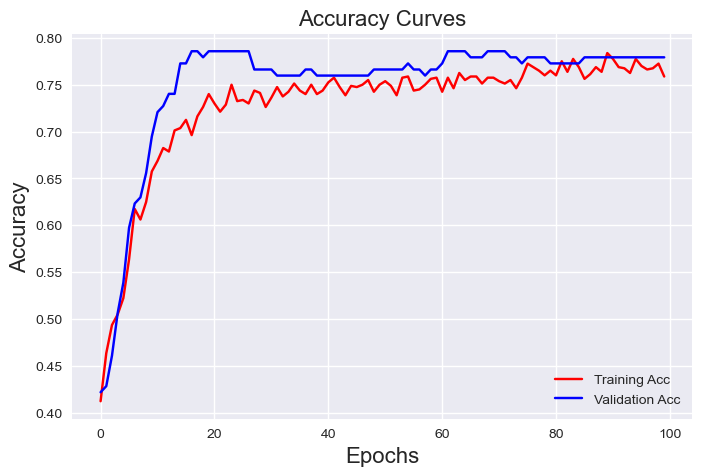

In [526]:
#accuracy vs. val_accuracy plot 
plt.figure(figsize=[8,5])
plt.plot(model_hist['accuracy'], 'r', label='Training Acc')
plt.plot(model_hist['val_accuracy'], 'b', label='Validation Acc')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

In [527]:
# evaluate the keras model in train dataset
_, accuracy = model.evaluate(X_train_resampled, y_train_resampled, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 78.87


In [528]:
# evaluate the keras model in test dateset
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 77.92


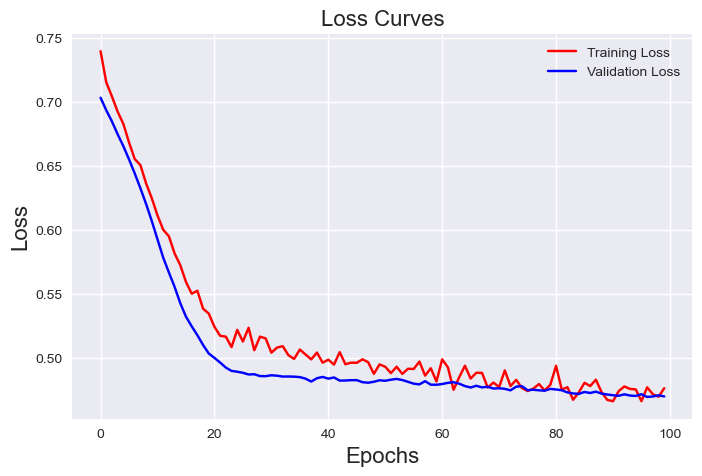

In [529]:
#loss vs. val_loss plot 
plt.figure(figsize=[8,5])
plt.plot(model_hist['loss'], 'r', label='Training Loss')
plt.plot(model_hist['val_loss'], 'b', label='Validation Loss')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)
plt.show()

In [530]:
# Make predictions on the test data
y_pred = model.predict(X_test)
# Make a dataframe of the predictions
df_y_pred=pd.DataFrame(y_pred, columns=["Outcomes"])
df_y_pred

5/5 [==============================] - 0s 2ms/step


,Outcomes
0,0.744235
1,0.045370
2,0.854516
3,0.805302
4,0.022730
...,...
149,0.709979
150,0.394962
151,0.862942
152,0.171796


array([[<AxesSubplot:title={'center':'Outcomes'}>]], dtype=object)

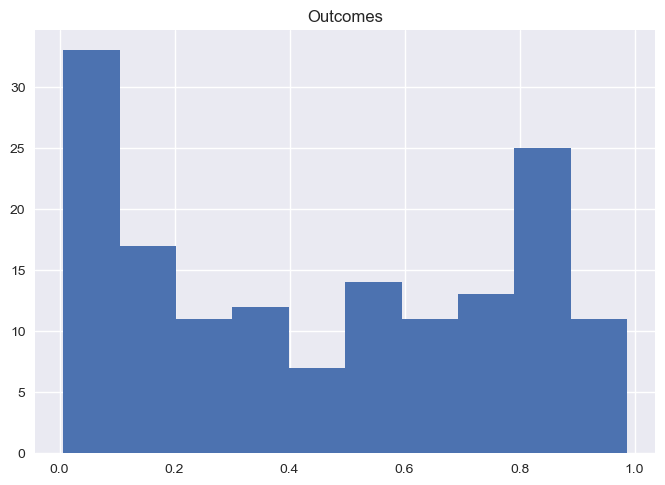

In [531]:
df_y_pred.hist()

In [532]:
# Apply a threshold to y_pred to convert it to binary predictions
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
confusion = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

print("Test Set Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

Test Set Accuracy: 0.7792207792207793
Confusion Matrix:
[[73 27]
 [ 7 47]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81       100
         1.0       0.64      0.87      0.73        54

    accuracy                           0.78       154
   macro avg       0.77      0.80      0.77       154
weighted avg       0.82      0.78      0.78       154



In [543]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred)

print("AUC value:")
print(roc_auc)

AUC value:
0.8746296296296296


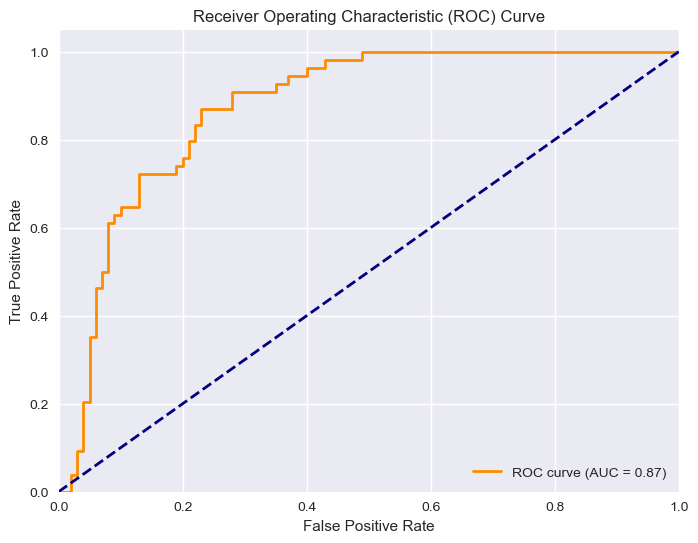

In [534]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Use the optimal threshold with the minimum FP + FN

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


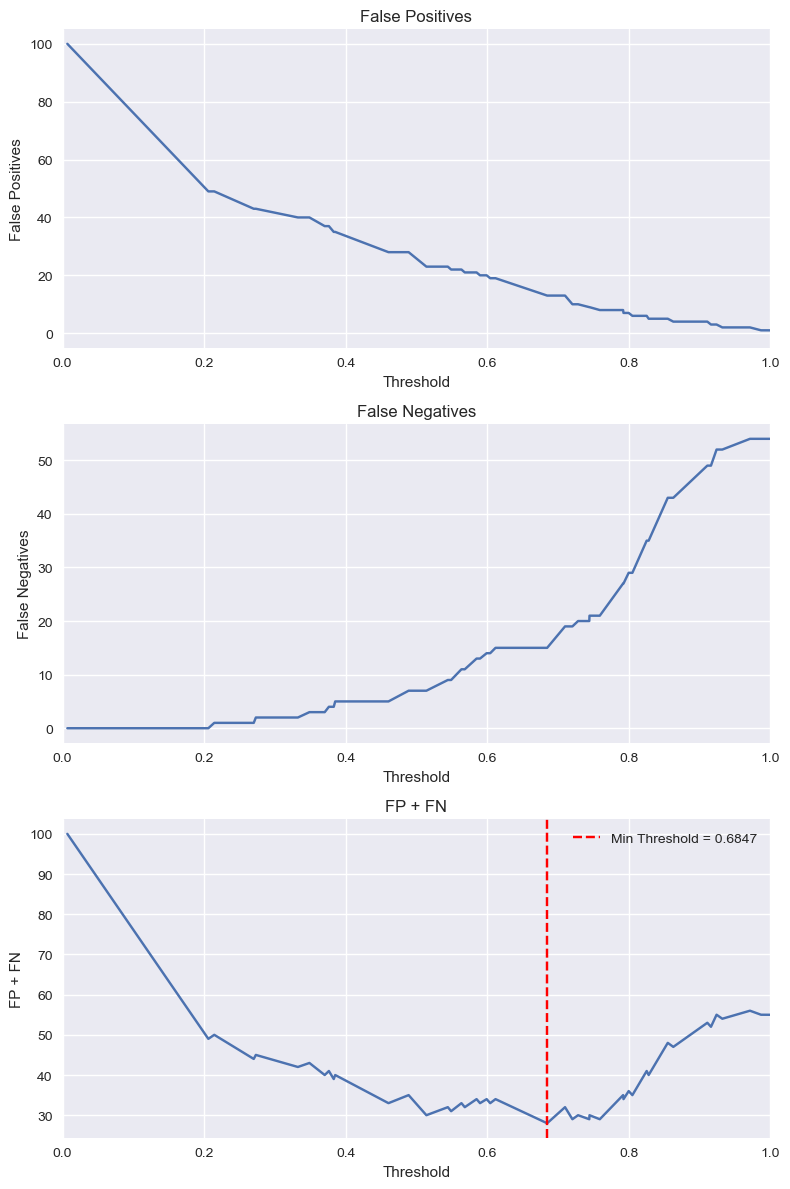

Minimum FP + FN Threshold: 0.6847


In [536]:
# Calculate FN and FP for multiple thresholds and their sum
fn = []
fp = []
fp_plus_fn = []

for i in range(len(thresholds)):
    # Use the threshold to classify the predictions
    y_pred_thresholded = (y_pred >= thresholds[i]).astype(int)

    # Calculate FN and FP using confusion matrix
    tn = np.sum((1 - y_test) * (1 - y_pred_thresholded))  # True Negatives
    fn.append(np.sum(y_test * (1 - y_pred_thresholded)))  # False Negatives
    fp.append(np.sum((1 - y_test) * y_pred_thresholded))  # False Positives
    fp_plus_fn.append(fn[i] + fp[i])

# Find the threshold with the minimum FP + FN
min_threshold_idx = np.argmin(fp_plus_fn)
min_threshold = thresholds[min_threshold_idx]

# Create separate plots for FP, FN, and FP + FN using plt.subplot
plt.figure(figsize=(8, 12))

# Plot False Positives
plt.subplot(311)
plt.plot(thresholds, fp)
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.xlabel('Threshold')
plt.ylabel('False Positives')
plt.title('False Positives')
plt.legend()

# Plot False Negatives
plt.subplot(312)
plt.plot(thresholds, fn)
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.xlabel('Threshold')
plt.ylabel('False Negatives')
plt.title('False Negatives')
plt.legend()

# Plot FP + FN
plt.subplot(313)
plt.plot(thresholds, fp_plus_fn)
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.axvline(x=min_threshold, color='red', linestyle='--', label=f'Min Threshold = {min_threshold:.4f}')
plt.xlabel('Threshold')
plt.ylabel('FP + FN')
plt.title('FP + FN')
plt.legend()

plt.tight_layout()
plt.show()

# Print the minimum threshold value
print(f'Minimum FP + FN Threshold: {min_threshold:.4f}')

#### Apply a new threshold to y_pred to convert it to binary predictions

In [537]:
y_pred_binary_new = (y_pred > min_threshold).astype(int)

#Evaluate the prediction with new treshold
accuracy = accuracy_score(y_test, y_pred_binary_new)
confusion = confusion_matrix(y_test, y_pred_binary_new)
classification_rep = classification_report(y_test, y_pred_binary_new)

print("Test Set Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

Test Set Accuracy: 0.8116883116883117
Confusion Matrix:
[[87 13]
 [16 38]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86       100
         1.0       0.75      0.70      0.72        54

    accuracy                           0.81       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154



##### We were able to reduce our FN+FP using new treshold
Our test accuracy also improved from 77.9 % to 81.2 %. Then let store the new predictions daatset into new dataframe

In [538]:
df_y_pred_binary_new=pd.DataFrame(y_pred_binary_new, columns=["Outcomes"])
df_y_pred_binary_new

,Outcomes
0,1
1,0
2,1
3,1
4,0
...,...
149,1
150,0
151,1
152,0


array([[<AxesSubplot:title={'center':'Outcomes'}>]], dtype=object)

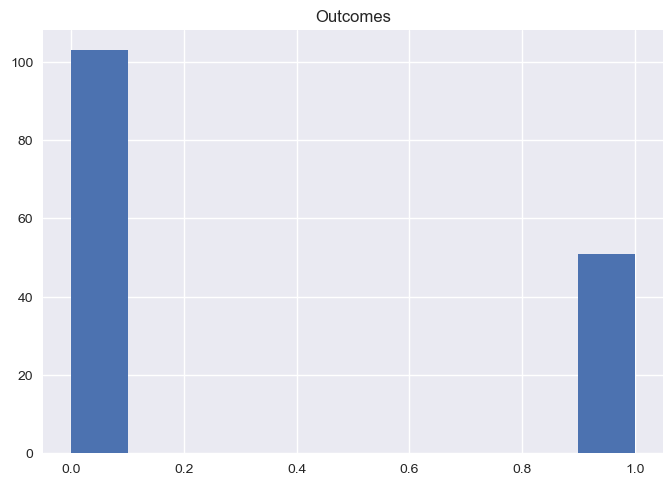

In [539]:
df_y_pred_binary_new.hist()